<a href="https://colab.research.google.com/github/Sunil17120/Deep-learning-/blob/main/DEnoising_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense ,Conv2D,MaxPool2D,UpSampling2D
from keras.datasets import mnist

In [ ]:
from keras.layers import MaxPooling2D
model=Sequential()
model.add(Conv2D(35,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,padding='same'))
model.add(Conv2D(25,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPooling2D(2,padding='same'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(25,kernel_size=3,activation='relu',padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(35,kernel_size=3,activation='relu',padding='same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,kernel_size=3,activation='relu',padding='same'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 35)     │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 25)     │         7,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 25)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 25)       │         5,650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 25)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 35)     │         7,910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           316 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,126 (86.43 KB)

 Trainable params: 22,126 (86.43 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
import numpy as np
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_valid=x_train[:5000]
x_train=x_train[5000:]
x_test=np.reshape(x_test,(len(x_test),28,28,1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
noise_factor=0.7
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
x_valid_noisy=x_valid+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_valid.shape)
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)
x_valid_noisy=np.clip(x_valid_noisy,0.,1.)

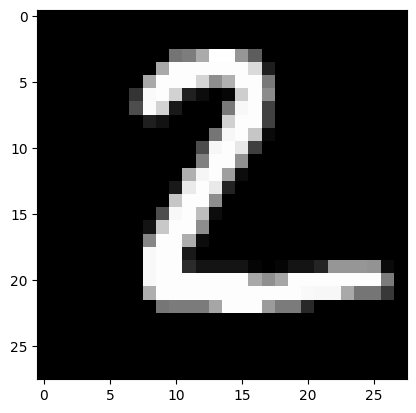

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1].reshape(28,28),cmap='gray')

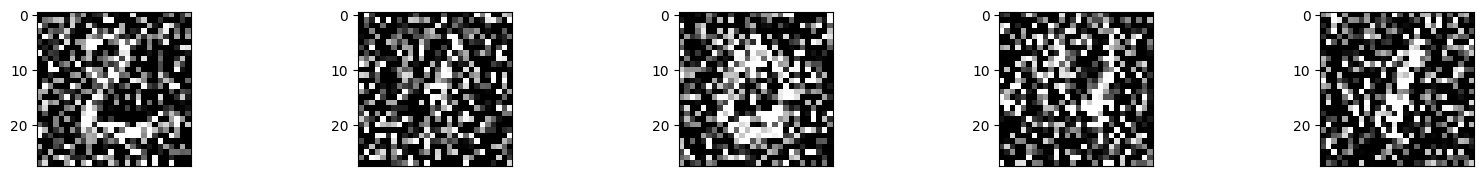

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(1,5+1):
    ax=plt.subplot(1,5,i)
    plt.imshow(x_test_noisy[i].reshape(28,28),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible
plt.show()

In [ ]:
model.fit(x_train_noisy,x_train,epochs=10,batch_size=128,shuffle=True,validation_data=(x_valid_noisy,x_valid))

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.2295 - val_loss: 0.2180
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1993 - val_loss: 0.1965
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1873 - val_loss: 0.1743
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1719 - val_loss: 0.2093
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1790 - val_loss: 0.1684
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.1732 - val_loss: 0.1666
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1702 - val_loss: 0.1816
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1756 - val_loss: 0.1599
Epoch 9/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1720 - val_loss: 0.1578
Epoch 10/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1735 - val_loss: 0.1561


In [ ]:
pred=model.predict(x_test_noisy)
plt.figure(figsize=(20,2))
for i in range(5):
    ax=plt.subplot(3,5,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("original image")